In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')

In [62]:
df = pd.read_csv('Resume.csv')

In [63]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [64]:
df.sample(5)

,Category,Resume
193,Mechanical Engineer,Education Details \r\nJune 2014 to June 2018 B...
545,Operations Manager,IT SKILLS â¢ Well versed with MS Office and I...
714,Database,"TECHNICAL SKILL: Operating System LINUX, Windo..."
377,Java Developer,"TECHNICAL SKILLS Skills: Java, SQL, PL/SQL, C,..."
383,Java Developer,"Operating Systems Windows XP, 7, 10. Tools/Pac..."


In [65]:
df.shape

(962, 2)

In [66]:
df['Category'].unique().size

25

df['Category'].value_counts()

## Data Visulaization

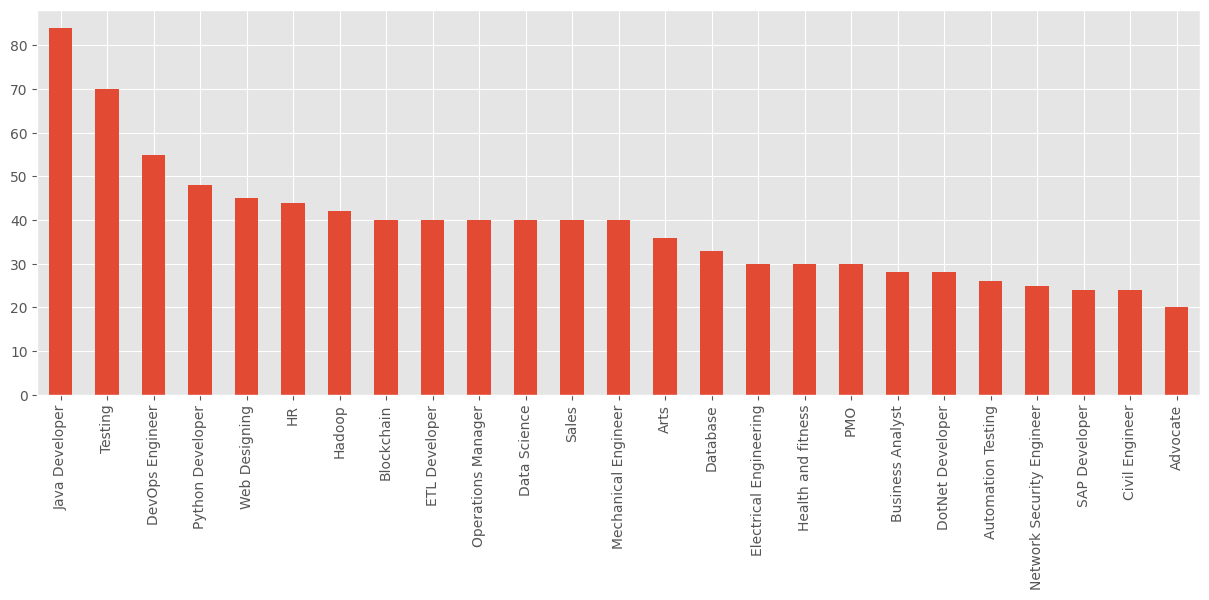

In [67]:
plt.figure(figsize=(15,5))
df['Category'].value_counts().plot(kind="bar")
plt.show()

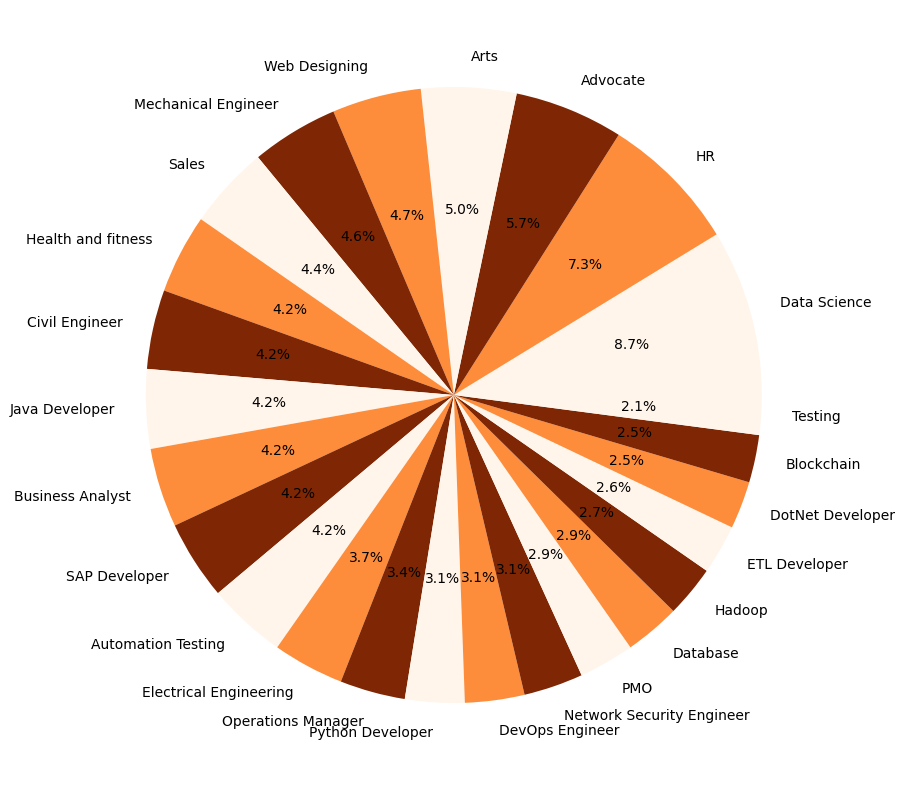

In [68]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct = "%1.1f%%",colors = plt.cm.Oranges(np.linspace(0,1,3)))

plt.show()

## Data Cleaning/Pre-Processing

In [69]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [70]:
#Steps
# Remove Emails
# Remove Special Characters
# Remove stopwords


In [71]:
def clean(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
    clean_text = url_pattern.sub('', text)
    clean_text = email_pattern.sub('', clean_text)
    
    clean_text = re.sub('[^\w\s]', '', clean_text)
    stop_words = set(stopwords.words('english'))
    clean_text  = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)
    
    return clean_text


<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
C:\Users\siddh\AppData\Local\Temp\ipykernel_19364\970796463.py:7: SyntaxWarning: invalid escape sequence '\w'
  clean_text = re.sub('[^\w\s]', '', clean_text)


In [72]:
s = 'Good Morning @#$% https://www.bing.com/search?q=kaggle&qs=n&form=QBRE&sp=-1&ghc=1&lq=0&pq=kagg&sc=10-4&sk=&cvid=31DCB984159C49718E4D9658DD44FB9D&ghsh=0&ghacc=0&ghpl='

In [73]:
news = clean(s)
news

'Good Morning'

In [74]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
df['Resume'] = df['Resume'].apply(lambda x : clean(x))

In [76]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run ana

## Encoding

In [77]:
le = LabelEncoder()
le.fit(df[['Category']])
df['Category'] = le.transform(df['Category'])

C:\Users\siddh\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [79]:
tfidf = TfidfVectorizer()
tfidf.fit(df['Resume'])
resume = tfidf.transform(df['Resume'])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(resume,df['Category'],test_size = 0.2, random_state=42)

In [81]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [82]:
X_train.shape

(769, 8017)

In [83]:
y_train.shape

(769,)

In [84]:
y_test.shape

(193,)

In [85]:
X_test.shape

(193, 8017)

In [86]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuarcy of the KNN Classifier on test data-> : {accuracy}")

Accuarcy of the KNN Classifier on test data-> : 0.9844559585492227


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


In [88]:
models = {
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB(),
}

In [89]:
accuracy_scores = {}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_scores[model_name]=accuracy
    print(f"Accuracy of the model : {model_name} is  : {accuracy}")

Accuracy of the model : KNeighborsClassifier is  : 0.9844559585492227
Accuracy of the model : LogisticRegression is  : 0.9948186528497409
Accuracy of the model : RandomForestClassifier is  : 0.9844559585492227
Accuracy of the model : SVC is  : 0.9948186528497409
Accuracy of the model : MultinomialNB is  : 0.9792746113989638


In [90]:
final_model = LogisticRegression()
final_model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [91]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))